In [68]:
# Loading the MNIST dataset
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from scipy.stats import multinomial,multivariate_normal

In [44]:
test_datapath = './Datasets/Test Images/t10k-images.idx3-ubyte'
train_datapath = './Datasets/Train Images/train-images.idx3-ubyte'
test_labelpath = './Datasets/Test Labels/t10k-labels.idx1-ubyte'
train_labelpath = './Datasets/Train Labels/train-labels.idx1-ubyte'

X_train = idx2numpy.convert_from_file(train_datapath)
y_train = idx2numpy.convert_from_file(train_labelpath)

X_test = idx2numpy.convert_from_file(test_datapath)
y_test = idx2numpy.convert_from_file(test_labelpath)


In [93]:
train_idx = np.where((y_train == 0) | (y_train == 1) | 
                     (y_train == 2) | (y_train == 3) | (y_train == 4))

test_idx = np.where((y_test == 0) | (y_test == 1) | 
                     (y_test == 2) | (y_test == 3) | (y_test == 4))

In [94]:
X_train = X_train[train_idx]
X_test = X_test[test_idx]
y_train = y_train[train_idx]
y_test = y_test[test_idx]

In [95]:
X_train = X_train/255
X_test = X_test/255

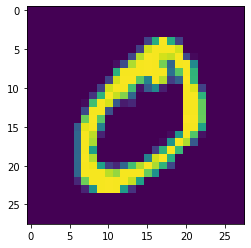

In [96]:
plt.imshow(X_train[0])

In [125]:
X_train_compressed = np.zeros((X_train.shape[0], 14,14))
X_test_compressed = np.zeros((X_test.shape[0], 14,14))

In [126]:
for i in range(X_train.shape[0]):
    X_train_compressed[i] = np.add.reduceat(np.add.reduceat(X_train[i], np.arange(0,X_train[i].shape[0],2), axis=0)
                                            , np.arange(0,X_train[i].shape[1],2), axis=1)/4

In [127]:
for i in range(X_test.shape[0]):
    X_test_compressed[i] = np.add.reduceat(np.add.reduceat(X_test[i], np.arange(0,X_test[i].shape[0],2), axis=0)
                                            , np.arange(0,X_test[i].shape[1],2), axis=1)/4

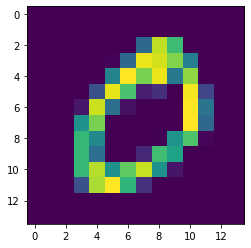

In [128]:
plt.imshow(X_train_compressed[0])

In [129]:
def generate_data(k, cluster_size, size, spherical=True, seed = 42):
    np.random.seed(seed)
    
    means = [np.random.rand(k) for _ in range(cluster_size)]
    
    if spherical: 
        covariance_matrix = [np.diag(np.ones(k)*np.random.rand()) for _ in range(cluster_size)]
    else:
        covariance_matrix = [np.diag(np.random.rand(k)) for _ in range(cluster_size)]
    
    normal_distributions = [multivariate_normal(
        mean=means[i], cov=covariance_matrix[i]) for i in range(cluster_size)]
    
    return np.array(normal_distributions)
          
        

In [132]:
N = X_train.shape[0]
k = 5 
threshold = 0.0001 

pi = np.random.dirichlet(np.ones(k))


In [133]:
pi.shape

(5,)

In [113]:
normal_distributions = generate_data(X_train.shape[1] * X_train.shape[2],k, N)

In [203]:
def expectation_step(X,initial_distributions, pi, clusters, threshold = 0.0001):
    F = dict()
    i = 0
    predictions = []
    for x in X:
        x_i = x.reshape(-1,1)
        denominator = np.sum(np.array([pi[k]*initial_distributions[k].pdf(x_i) for k in range(clusters)]))
        F[i] = [pi[k]*initial_distributions[k].pdf(x_i)/denominator for k in range(clusters)]
        max_val = np.argmax(F[i])//x_i.shape[0]
        predictions.append(max_val)
        i+=1
    return (F, predictions)

def maximization_step(X, F, clusters, initial_distributions, spherical=True):
    pass



In [204]:
print(expectation_step(X_train_compressed, normal_distributions, pi, k))